## Python imports

In [1]:
import scipy as sp

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, Checkbox
from IPython.display import display
%matplotlib inline

## Define concentrations 

In [2]:
C1 = sp.array([0.085, 0.178])
C2 = sp.array([0.046, 0.594])
C3 = sp.array([0.05, 0.25])

## Plotting function 

In [3]:
def plot_fn(c1c2_l=0.5, c2c3_l=0.5, m1m2_l=0.5):
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    plt.hold(True)
    
    #calc mixture concentration
    Cm1 = C1 + c1c2_l*(C2-C1)
    Cm2 = C2 + c2c3_l*(C3-C2)
    
    Cm = Cm1 + m1m2_l*(Cm2-Cm1)
    
    #calc colors of markers to visually show mixture compositions
    red_color = sp.array([1,0,0])
    blue_color = sp.array([0,0,1])
    yellow_color = sp.array([1,1,0])
    
    Cm1_color = red_color + c1c2_l*(blue_color-red_color)
    Cm2_color = blue_color + c2c3_l*(yellow_color-blue_color)
    Cm_color = Cm1_color + m1m2_l*(Cm2_color -Cm1_color)
    
    #plot beaker concentrations
    plt.plot(C1[0],C1[1], 's', color=red_color, markersize=10)
    plt.plot(C2[0],C2[1], 's', color=blue_color, markersize=10)
    plt.plot(C3[0],C3[1], 's', color=yellow_color, markersize=10)
    
    #concentration labels
    ax.text(C1[0]*1.02, C1[1],       'C1', fontsize=12)
    ax.text(C2[0]*0.90, C2[1],       'C2', fontsize=12)
    ax.text(C3[0]*0.90, C3[1]*0.80,  'C3', fontsize=12)
    ax.text(Cm1[0],     Cm1[1]*1.08, 'B1', fontsize=10)
    ax.text(Cm2[0],     Cm2[1]*0.90, 'B2', fontsize=10)
    
    #plot intermediate mixing lines
    ax.plot(Cm1[0],Cm1[1], 'v', color=Cm1_color, markersize=10)
    ax.plot(Cm2[0],Cm2[1], 'v', color=Cm2_color, markersize=10)
    ax.plot([Cm1[0],Cm2[0]], [Cm1[1],Cm2[1]], 'k--')
    
    #plot mixture concentration
    
    ax.plot(Cm[0],Cm[1], 'o', color=Cm_color, markersize=10)
    
    ax.axis([0.03, 0.1, 0.1, 0.7])
    ax.set_xlabel('NaCl (mol/L)')
    ax.set_ylabel('KOH (mol/L)')
    
    plt.show(fig)

## Interact 

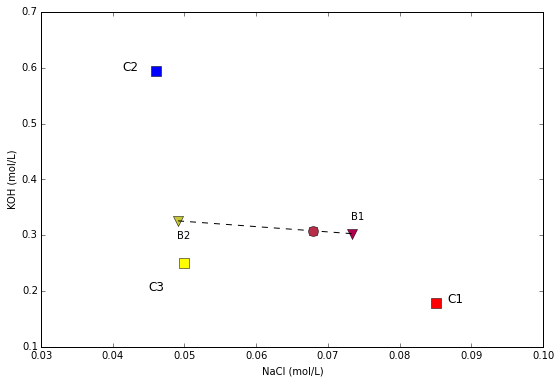

In [4]:
interactive(plot_fn, c1c2_l=(0,1,0.02), c2c3_l=(0,1,0.02), m1m2_l=(0,1,0.02))